In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [27]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [28]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [29]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [30]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [31]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [32]:
classes[y_train[3]]

'deer'

In [33]:
def plot_sample(X,y,index):
    plt.figure(figsize=(10,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

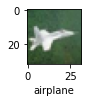

In [34]:
plot_sample(X_train,y_train,77)

### Normalizing the training data

In [35]:
X_train=X_train/255
y_train=y_train/255

#### Build simple artificial neural network for image classification

In [38]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 110s 71ms/step - loss: 0.0021 - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.0729e-06 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.0729e-06 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.0729e-06 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0729e-06 - accuracy: 0.1000


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(elements) for elements in y_pred]

In [42]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\osama\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\osama\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\osama\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Now let us build a convolutional neural network to train our images

In [47]:
cNN=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(60,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [49]:
cNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
cNN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0040 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 9.0106e-08 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 2.7027e-08 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 5.4472e-09 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9597e-09 - accuracy: 0.1000


In [52]:
cNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 16446.8906 - accuracy: 0.1000


[16446.890625, 0.10000000149011612]

In [54]:
y_pred=cNN.predict(X_test)

In [55]:
y_pred[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
y_classes=[np.argmax(element) for element in y_pred]

In [59]:
y_classes[:5]

[0, 0, 0, 0, 0]

In [ ]:
plot_sample